## Age Distribution by Munipality

This is a dataset that we got from [PORDATA](https://www.pordata.pt/pt/estatisticas/populacao/populacao-residente/populacao-residente-por-sexo-e-grupo-etario), the original dataset, contains the age and gender distribution of the population of each municipality in Portugal.

For the sake of this work, we are not intersted in the gender distribution, so we will only use the age distribution. The original dataset also has a wide number of columns, but again, for the sake of simplicity, we decided to merge some of the "age buckets" into more meaningful ones.

The age distribution is a crucial part of the housing market, as it drives the demand for housing and the supply of housing. Understanding the age distribution of a municipality is essential for grasping the housing prices and trends for the future.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

from src.config import AGE_CLEAN_FILE, AGE_COLUMNS, DENSITY_CLEAN_FILE

In [2]:
df_age_dist = pd.read_csv(AGE_CLEAN_FILE)
df_age_dist.head()

,municipality,year,< 5,6 - 19,20 - 34,35 - 54,55 - 64,> 65
0,Abrantes,2019,1078.0,4361.0,4136.0,9161.0,5522.0,10673.0
1,Abrantes,2020,1066.0,4211.0,4220.0,8859.0,5516.0,10686.0
2,Abrantes,2021,1016.0,4104.0,4245.0,8611.0,5474.0,10722.0
3,Abrantes,2022,1015.0,4016.0,4225.0,8512.0,5389.0,10701.0
4,Abrantes,2023,1003.0,3991.0,4429.0,8290.0,5360.0,10738.0


The dataset is composed of the following columns:

- municipality: Municipality name
- year: Year of the data (this goes from 2019 up to 2023)
- < 5: Population below 5 years old
- 5 - 19: Population between 5 and 19 years old
- 20 - 34: Population between 20 and 34 years old
- 35 - 54: Population between 35 and 54 years old
- 55 - 64: Population between 55 and 64 years old
- \> 65: Population over 65 years old




Our objective is to categorize Portugal's poplation into meaningful age cohorts based on life stages:

* 0 - 5 years (Early childhood) : Indivuals typically requiring full-time care, either from family or daycare centers.

* 6 - 19 years (School Age): Adolscents and students, largely living with their parents and enrolled in mandatory schooling.

* 20 - 34 years (Young Adults): Individuals transitioning into the workforce or completing higher education.

* 35 - 54 years (Prime Working Age) : The core workforce, typically charecterized by career stability and family formation.

* 55 - 64 years (Pre-Retirement): Senior workforce members, approaching retirement age.

* 65+ years (Seniors) : The retired populations, consisting of indivuals living independently, with family, or in senior care facilities



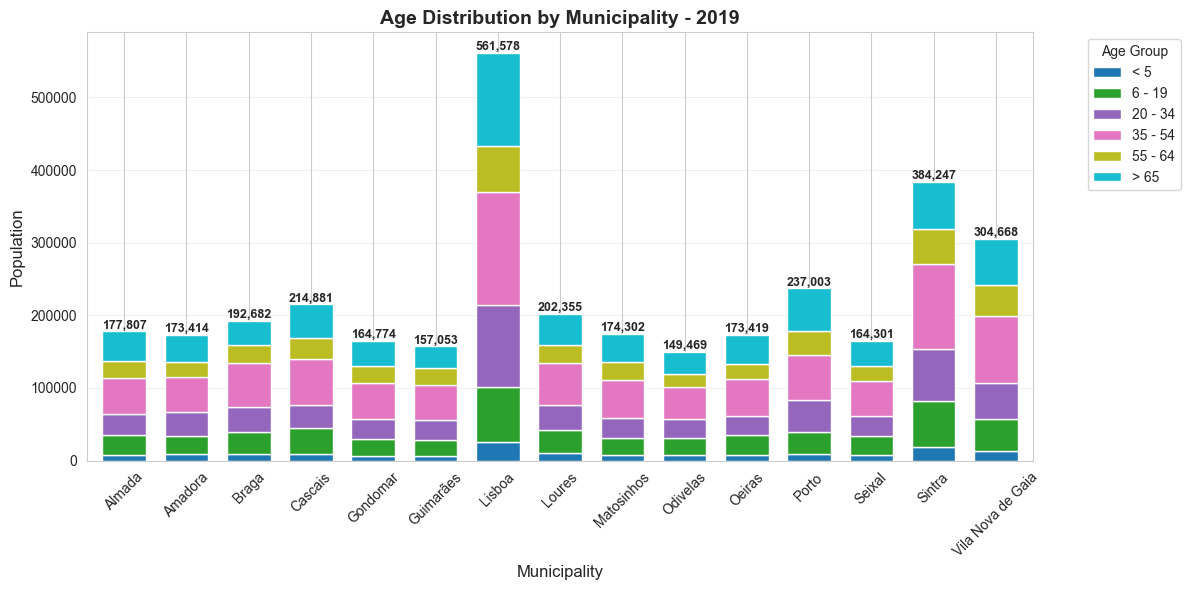

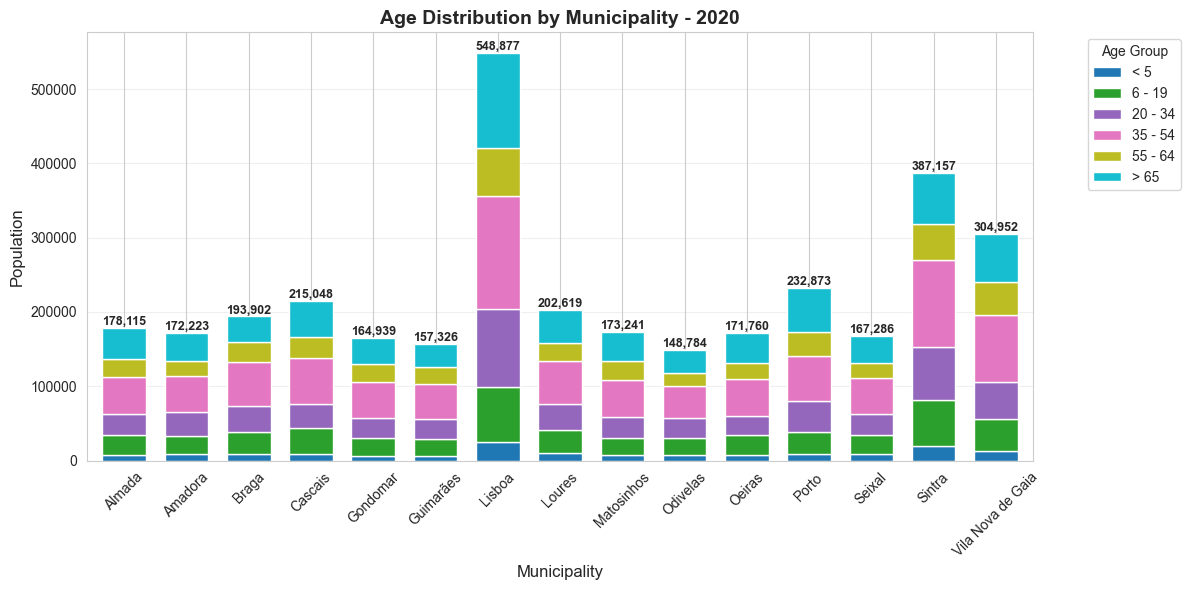

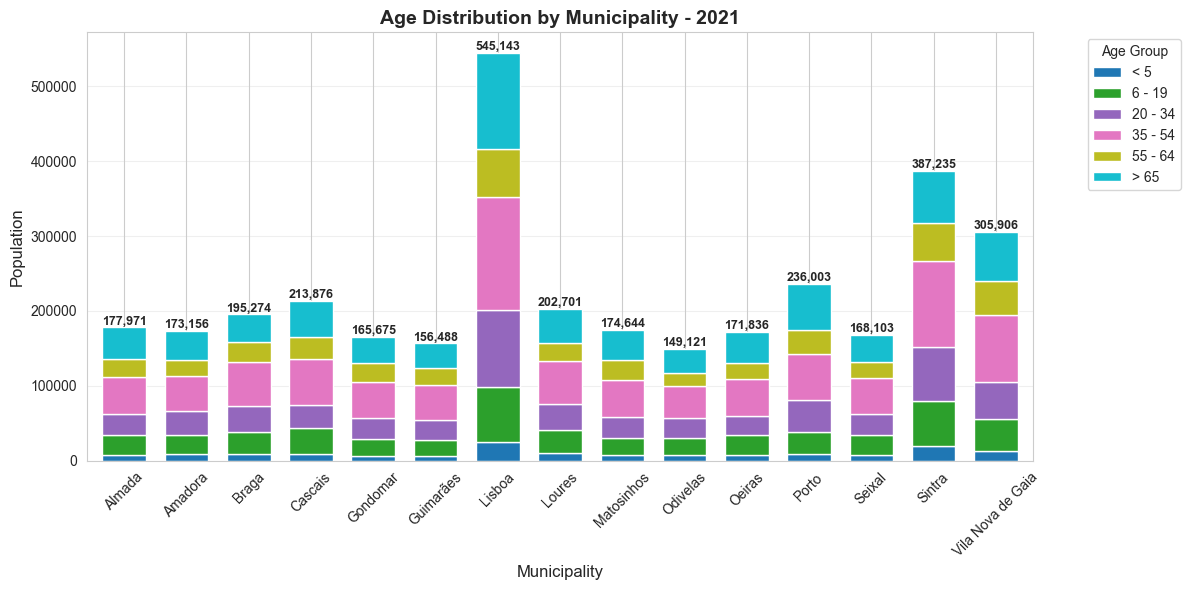

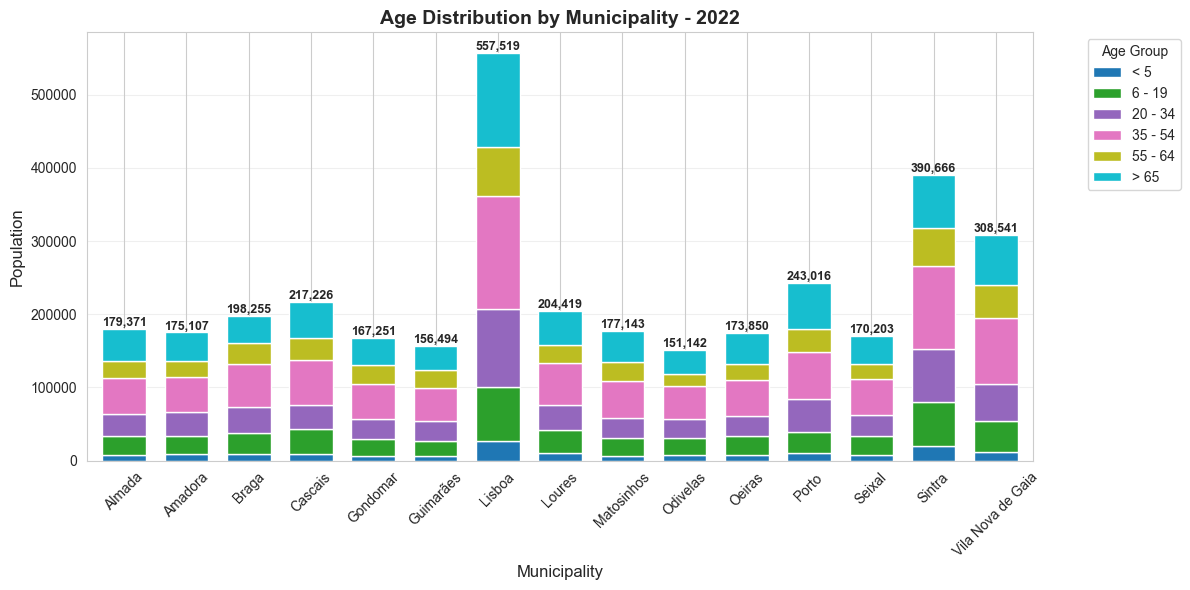

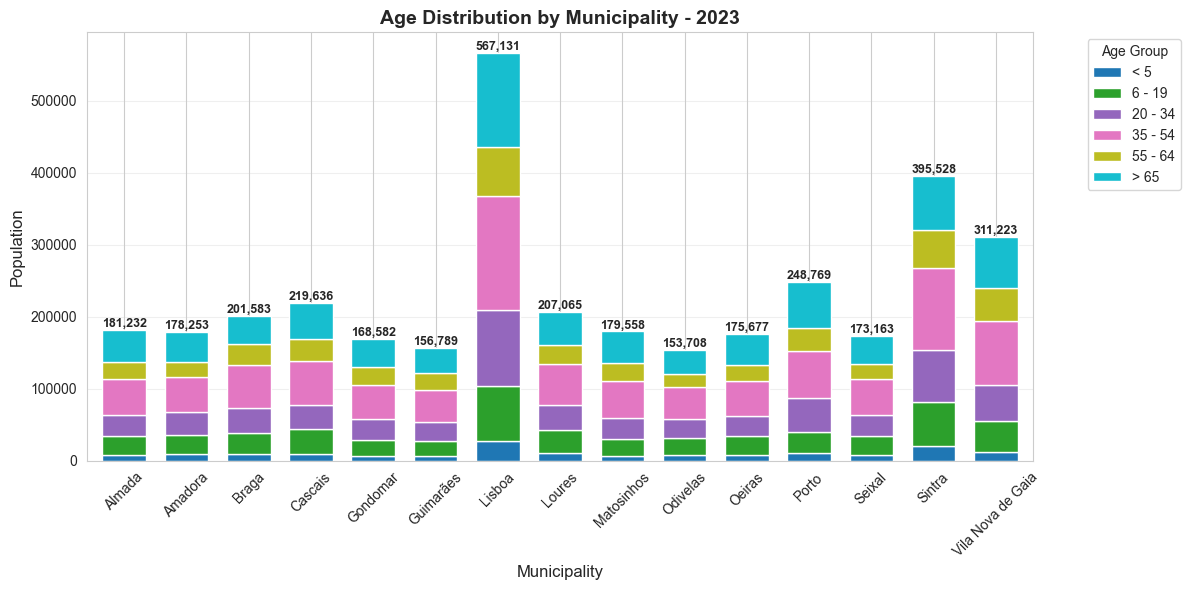

In [3]:
top_municipalities = df_age_dist.groupby('municipality')[AGE_COLUMNS].sum().sum(axis=1).nlargest(15).index.tolist()
df_top = df_age_dist[df_age_dist['municipality'].isin(top_municipalities)]

years = sorted(df_age_dist['year'].unique())

for year in years:
    df_year = df_top[df_top['year'] == year].set_index('municipality')[AGE_COLUMNS]

    fig, ax = plt.subplots(figsize=(12, 6))

    df_year.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.7,
        colormap='tab10'
    )

    totals = df_year.sum(axis=1)
    for idx, (municipality, total) in enumerate(totals.items()):
        ax.text(idx, total, f'{int(total):,}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_title(f'Age Distribution by Municipality - {year}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Municipality', fontsize=12)
    ax.set_ylabel('Population', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')
    ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    plt.tight_layout()
    plt.show()

By analyzing the top 15 municipalities, we can identify a strong grographic concentrtion: nearly all are located in the Lisbon or Porto metropolitan areas, with Braga and Guimarães being the outliers. While populaton aging is a universal trend across all 15 locations, migration patterns tell another story. Guimarães stands out as the only location facing a decline in population whereas Braga (neares location of them all) shows a divergent trajectory with a robust growth rate. Another relavant observation is that the cities with more children are the ones in the periphery of Lisbon (Odivelas, Amadora and Sintra), lastly we can see that the city with the biggest growth was Setubal.

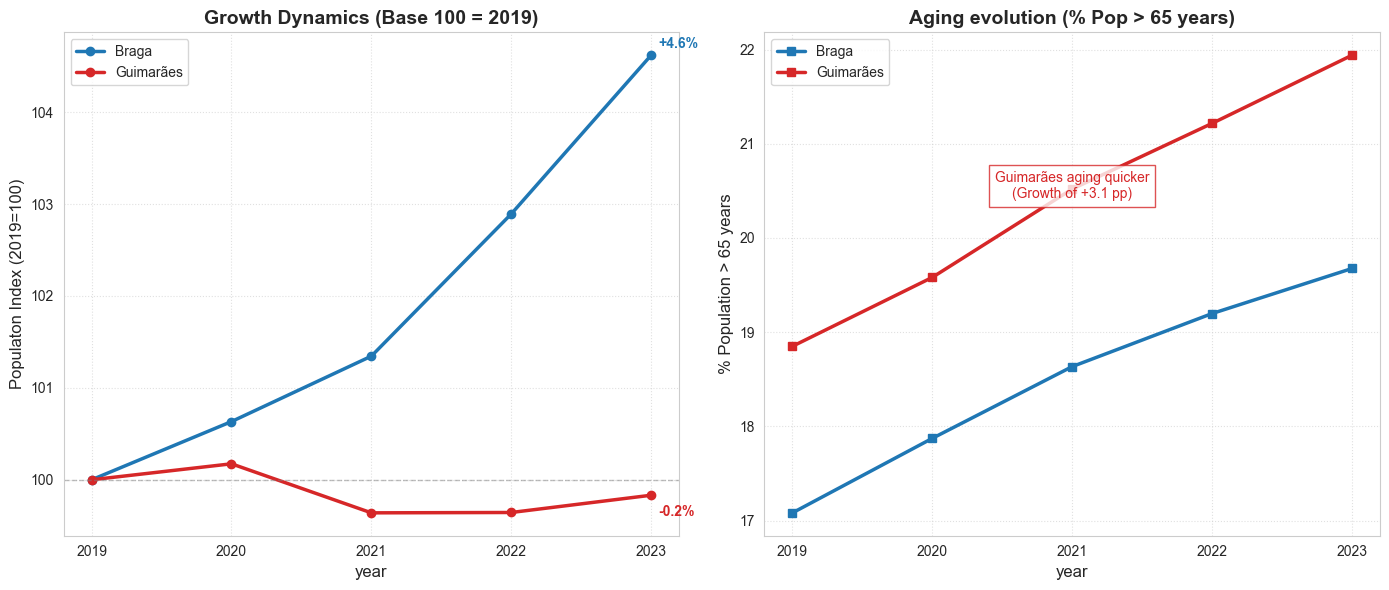

In [12]:
cities = ['Braga', 'Guimarães']
df_filtered = df_age_dist[df_age_dist['municipality'].isin(cities)].copy()

df_filtered['Total_Pop'] = df_filtered[AGE_COLUMNS].sum(axis=1)
df_filtered['Pct_65_Plus'] = (df_filtered['> 65'] / df_filtered['Total_Pop']) * 100

df_braga = df_filtered[df_filtered['municipality'] == 'Braga'].sort_values('year')
df_guimaraes = df_filtered[df_filtered['municipality'] == 'Guimarães'].sort_values('year')

df_braga['Pop_Index'] = (df_braga['Total_Pop'] / df_braga['Total_Pop'].iloc[0]) * 100
df_guimaraes['Pop_Index'] = (df_guimaraes['Total_Pop'] / df_guimaraes['Total_Pop'].iloc[0]) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
years = df_braga['year']

color_braga = '#1f77b4'
color_guimaraes = '#d62728'

ax1.plot(years, df_braga['Pop_Index'], marker='o', linewidth=2.5, color=color_braga, label='Braga')
ax1.plot(years, df_guimaraes['Pop_Index'], marker='o', linewidth=2.5, color=color_guimaraes, label='Guimarães')

ax1.axhline(y=100, color='gray', linestyle='--', alpha=0.5, linewidth=1)

ax1.set_title("Growth Dynamics (Base 100 = 2019)", fontsize=14, fontweight='bold')
ax1.set_ylabel("Populaton Index (2019=100)", fontsize=12)
ax1.set_xlabel("year", fontsize=12)
ax1.set_xticks(years)
ax1.grid(True, linestyle=':', alpha=0.6)
ax1.legend()

last_braga = df_braga['Pop_Index'].iloc[-1]
last_guimaraes = df_guimaraes['Pop_Index'].iloc[-1]
ax1.annotate(f'+{last_braga-100:.1f}%', xy=(2023, last_braga), xytext=(5, 5), textcoords='offset points', color=color_braga, fontweight='bold')
ax1.annotate(f'{last_guimaraes-100:.1f}%', xy=(2023, last_guimaraes), xytext=(5, -15), textcoords='offset points', color=color_guimaraes, fontweight='bold')


ax2.plot(years, df_braga['Pct_65_Plus'], marker='s', linewidth=2.5, color=color_braga, label='Braga')
ax2.plot(years, df_guimaraes['Pct_65_Plus'], marker='s', linewidth=2.5, color=color_guimaraes, label='Guimarães')

ax2.set_title("Aging evolution (% Pop > 65 years)", fontsize=14, fontweight='bold')
ax2.set_ylabel("% Population > 65 years", fontsize=12)
ax2.set_xlabel("year", fontsize=12)
ax2.set_xticks(years)
ax2.grid(True, linestyle=':', alpha=0.6)
ax2.legend()

diff_guimaraes = df_guimaraes['Pct_65_Plus'].iloc[-1] - df_guimaraes['Pct_65_Plus'].iloc[0]

ax2.text(2021, df_guimaraes['Pct_65_Plus'].mean(), 
         f"Guimarães aging quicker\n(Growth of +{diff_guimaraes:.1f} pp)", 
         color=color_guimaraes, ha='center', fontsize=10, 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor=color_guimaraes))

plt.tight_layout()
plt.show()

Even though Guimarães and Braga are closer to each other geographically, this does not translate into shared demographic destiny. While Braga manages to counteract aging with robust population growth, Guimarães suffers a "double impact": it loses total poplation and, consequently, ages at a faster rate, creating an ever-widening demographic gap between the two cities

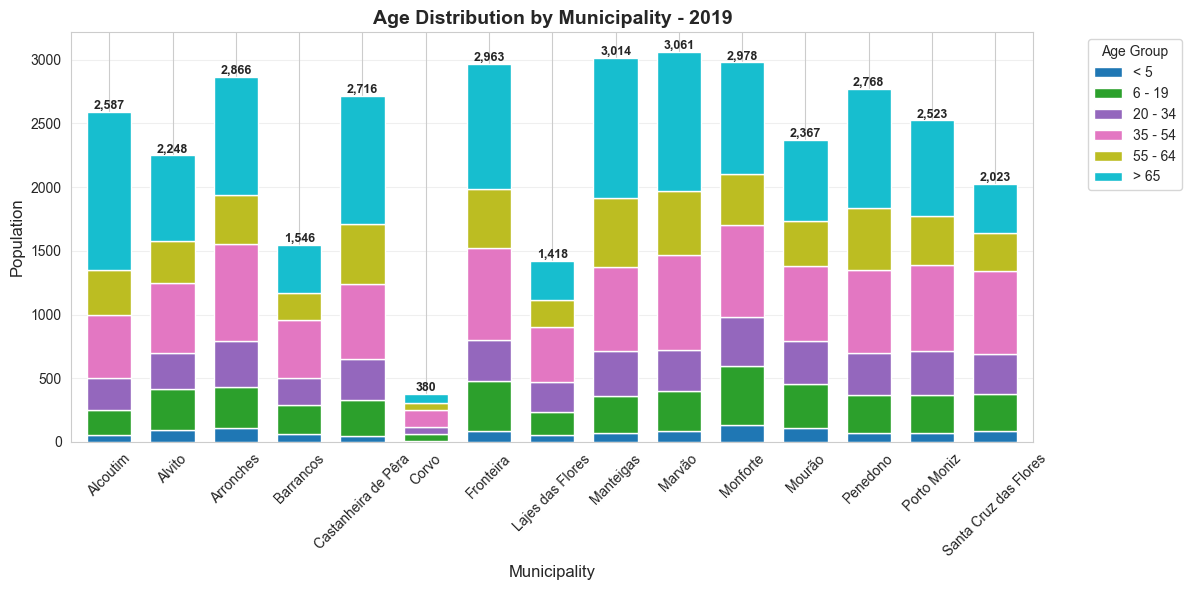

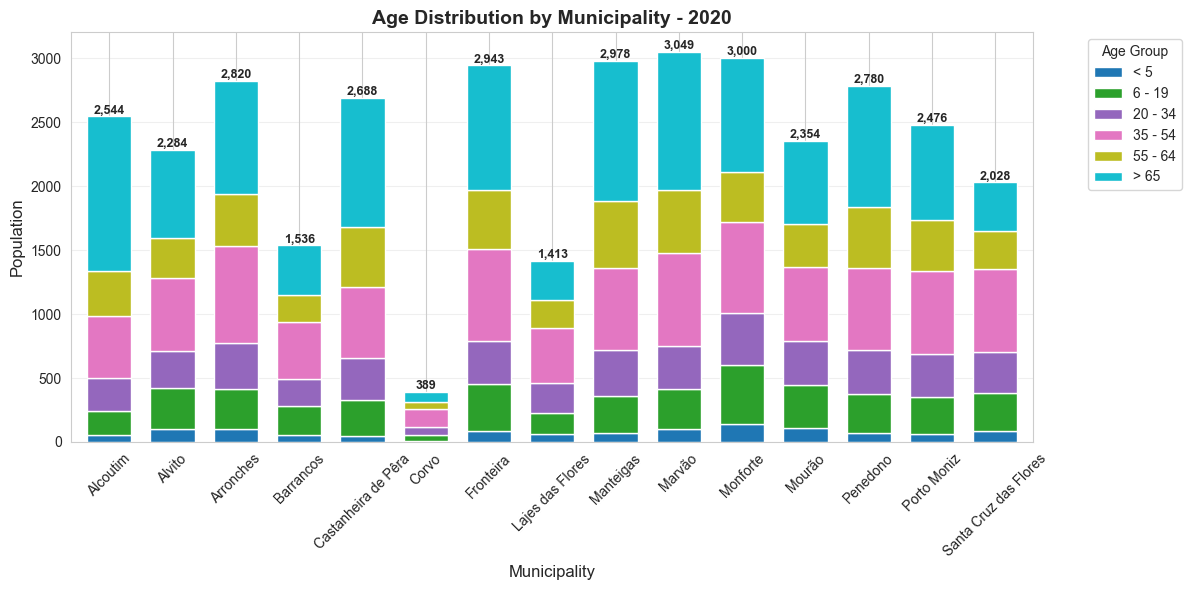

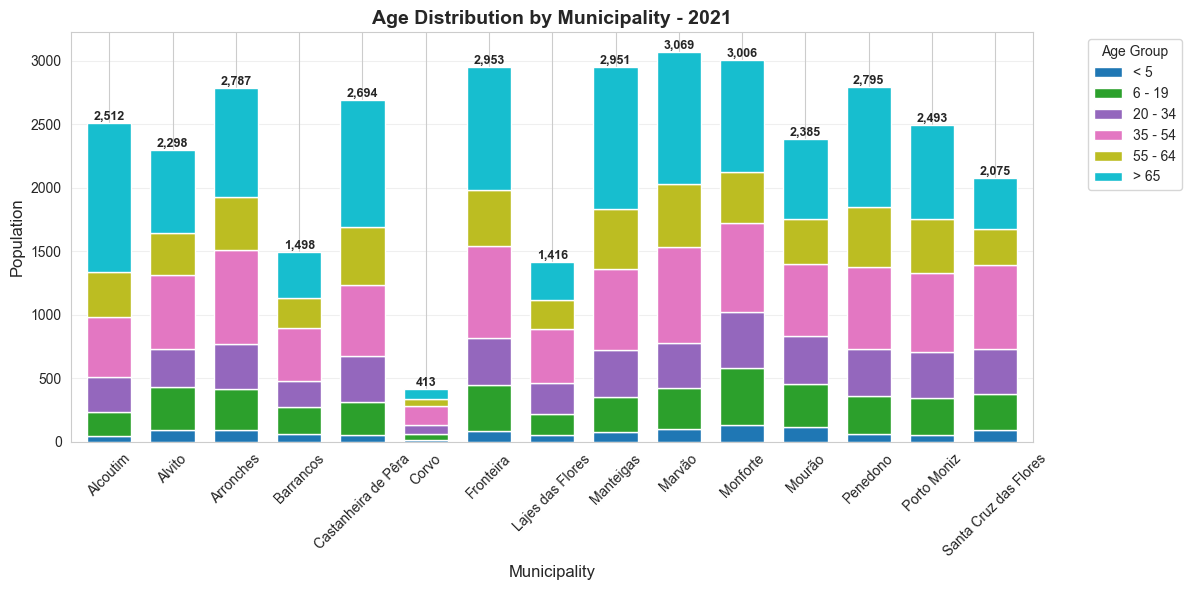

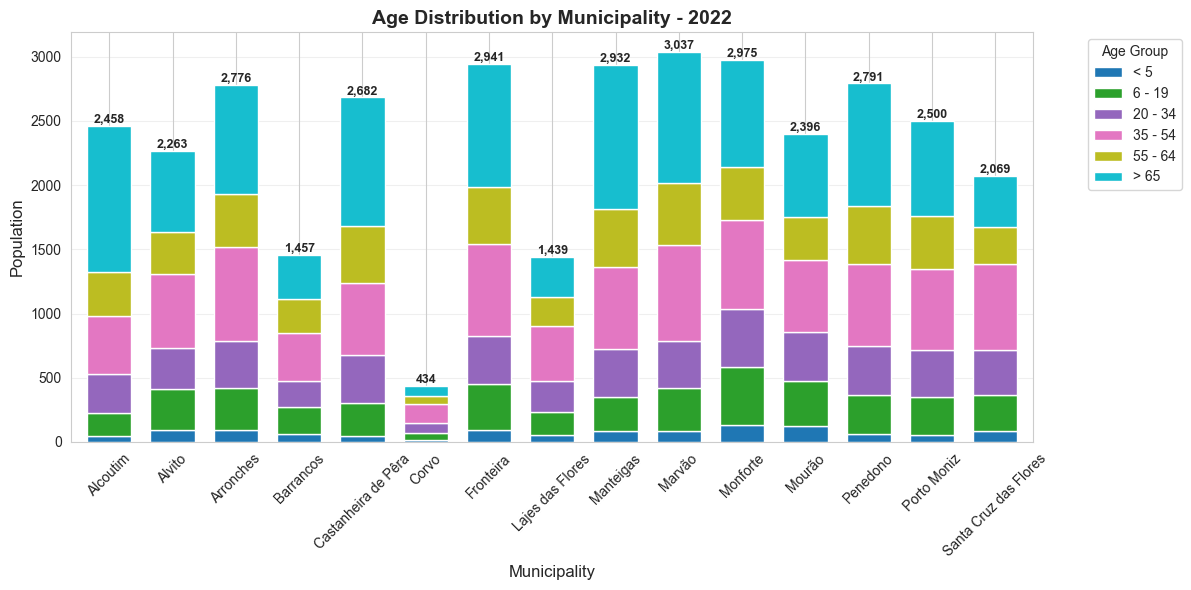

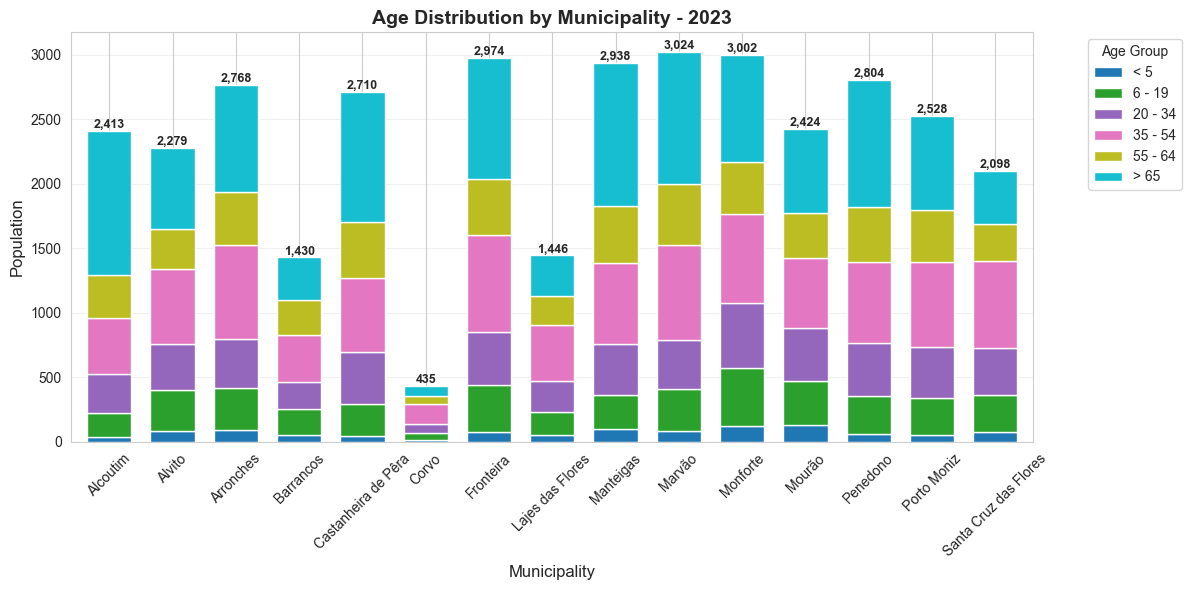

In [13]:
bot_municipalities = df_age_dist.groupby('municipality')[AGE_COLUMNS].sum().sum(axis=1).nsmallest(15).index.tolist()
df_bot = df_age_dist[df_age_dist['municipality'].isin(bot_municipalities)]

years = sorted(df_age_dist['year'].unique())

for year in years:
    df_year = df_bot[df_bot['year'] == year].set_index('municipality')[AGE_COLUMNS]

    fig, ax = plt.subplots(figsize=(12, 6))

    df_year.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.7,
        colormap='tab10'
    )

    totals = df_year.sum(axis=1)
    for idx, (municipality, total) in enumerate(totals.items()):
        ax.text(idx, total, f'{int(total):,}', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    ax.set_title(f'Age Distribution by Municipality - {year}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Municipality', fontsize=12)
    ax.set_ylabel('Population', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3, axis='y')
    ax.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    
    plt.tight_layout()
    plt.show()

Now, in this last set of charts, we analyze the age distribution of the 15 least populated municipalities in Portugal. While the aggregate population of this group slightly declined, if we carefuly analyze each location, we can conclude that while the ones from the continent are experiencing a decline, the ones from Azores, defy this trend. Corvo recorded a remarkable population surge. Besides that, we can also conclude that the elder population in this group of municipalities is more expressive compared to the most populated ones.

# Population Density Analysis

Population density measures how many people live per square kilometer in each municipality. This metric is crucial for understanding urbanization patterns and housing market dynamics. High-density areas typically have different housing needs and price drivers compared to rural, low-density regions.

In [5]:
df_density = pd.read_csv(DENSITY_CLEAN_FILE)
df_density.head(10)

,year,municipality,people/km2
0,2019,Abrantes,48.9
1,2019,Águeda,137.8
2,2019,Aguiar da Beira,26.0
3,2019,Alandroal,9.4
4,2019,Albergaria-a-Velha,156.4
5,2019,Albufeira,316.1
6,2019,Alcácer do Sal,7.6
7,2019,Alcanena,98.7
8,2019,Alcobaça,133.7
9,2019,Alcochete,147.9


Density trajectories reveal distinct urbanization patterns across Portugal. Growing suburbs around major metros show steady upward trends, declining interior regions exhibit consistent population loss, while regional capitals maintain relatively stable densities. These divergent paths underscore the polarization between coastal urban centers and inland rural areas.

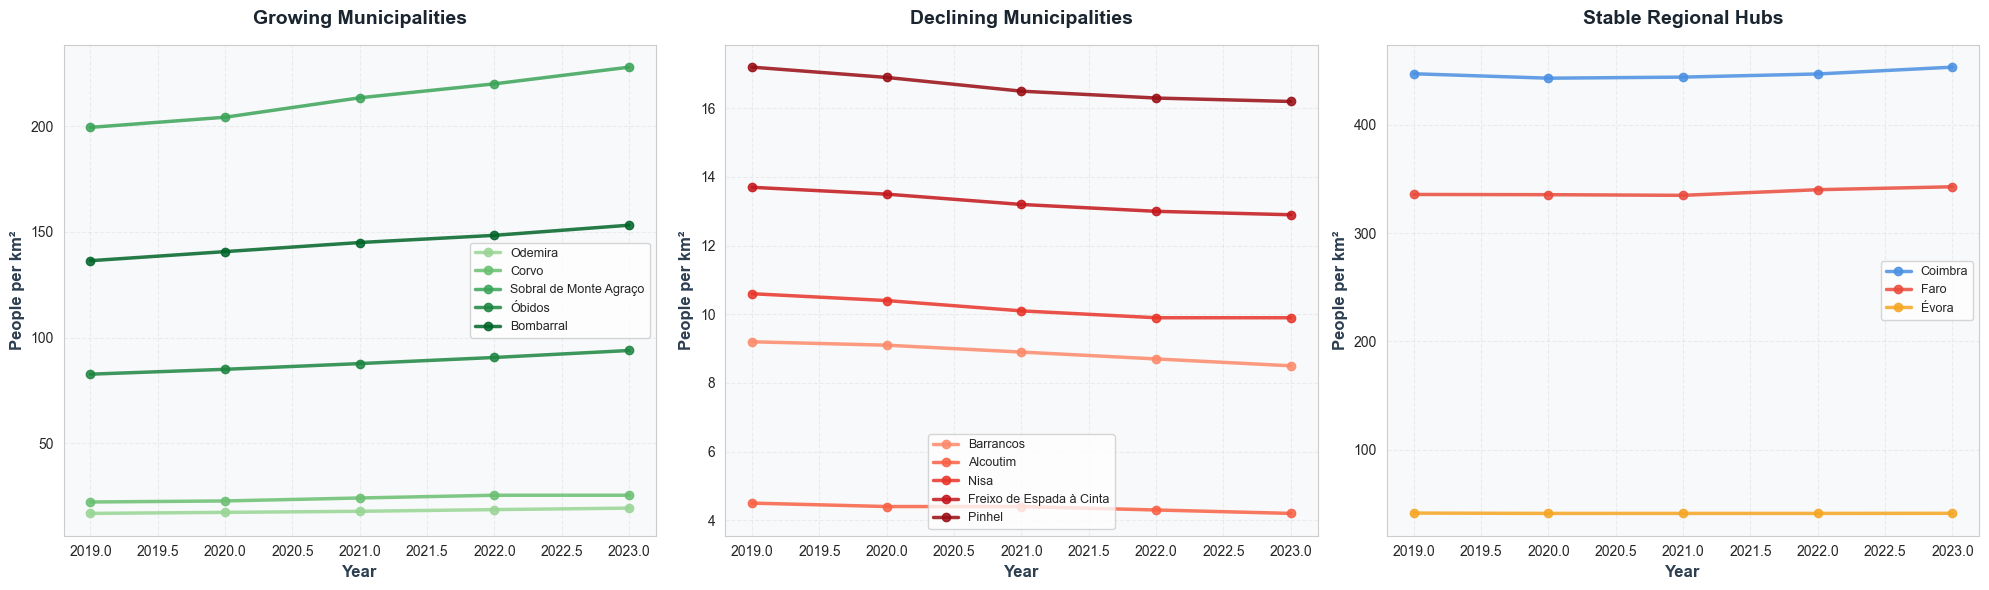

In [6]:
years_density = sorted(df_density['year'].unique())
df_density_change = df_density.pivot(index='municipality', columns='year', values='people/km2')
df_density_change['change_pct'] = ((df_density_change[2023] - df_density_change[2019]) / df_density_change[2019]) * 100
df_density_change = df_density_change.dropna()


top_5_growth = df_density_change.nlargest(5, 'change_pct').index.tolist()
top_5_decline = df_density_change.nsmallest(5, 'change_pct').index.tolist()
stable_cities = ['Coimbra', 'Faro', 'Évora']

selected_municipalities = top_5_growth + top_5_decline + stable_cities

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.patch.set_facecolor('white')

colors_growth = plt.cm.Greens(np.linspace(0.4, 0.9, len(top_5_growth)))
colors_decline = plt.cm.Reds(np.linspace(0.4, 0.9, len(top_5_decline)))
colors_stable = ['#4A90E2', '#E94B3C', '#F5A623']

for i, city in enumerate(top_5_growth):
    city_data = df_density[df_density['municipality'] == city].sort_values('year')
    ax1.plot(city_data['year'], city_data['people/km2'], marker='o', linewidth=2.5, 
             label=city, color=colors_growth[i], alpha=0.85)

ax1.set_title('Growing Municipalities', fontsize=14, fontweight='bold', color='#1A252F', pad=15)
ax1.set_xlabel('Year', fontsize=12, fontweight='600', color='#2C3E50')
ax1.set_ylabel('People per km²', fontsize=12, fontweight='600', color='#2C3E50')
ax1.legend(fontsize=9, loc='best')
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_facecolor('#F8F9FA')

for i, city in enumerate(top_5_decline):
    city_data = df_density[df_density['municipality'] == city].sort_values('year')
    ax2.plot(city_data['year'], city_data['people/km2'], marker='o', linewidth=2.5, 
             label=city, color=colors_decline[i], alpha=0.85)

ax2.set_title('Declining Municipalities', fontsize=14, fontweight='bold', color='#1A252F', pad=15)
ax2.set_xlabel('Year', fontsize=12, fontweight='600', color='#2C3E50')
ax2.set_ylabel('People per km²', fontsize=12, fontweight='600', color='#2C3E50')
ax2.legend(fontsize=9, loc='best')
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_facecolor('#F8F9FA')

for i, city in enumerate(stable_cities):
    if city in df_density['municipality'].values:
        city_data = df_density[df_density['municipality'] == city].sort_values('year')
        ax3.plot(city_data['year'], city_data['people/km2'], marker='o', linewidth=2.5, 
                 label=city, color=colors_stable[i], alpha=0.85)

ax3.set_title('Stable Regional Hubs', fontsize=14, fontweight='bold', color='#1A252F', pad=15)
ax3.set_xlabel('Year', fontsize=12, fontweight='600', color='#2C3E50')
ax3.set_ylabel('People per km²', fontsize=12, fontweight='600', color='#2C3E50')
ax3.legend(fontsize=9, loc='best')
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.set_facecolor('#F8F9FA')

plt.tight_layout()
plt.show()

Density changes between 2019 and 2023 highlight migration flows and demographic shifts. Growing municipalities cluster around Lisbon and Porto peripheries (Setúbal, Seixal, Cascais), benefiting from metropolitan spillover as people seek affordable housing near employment centers. Meanwhile, interior regions continue losing density due to aging populations and youth outmigration. This coastal concentration trend suggests housing demand is increasingly shifting to suburban rings rather than city centers or rural areas.

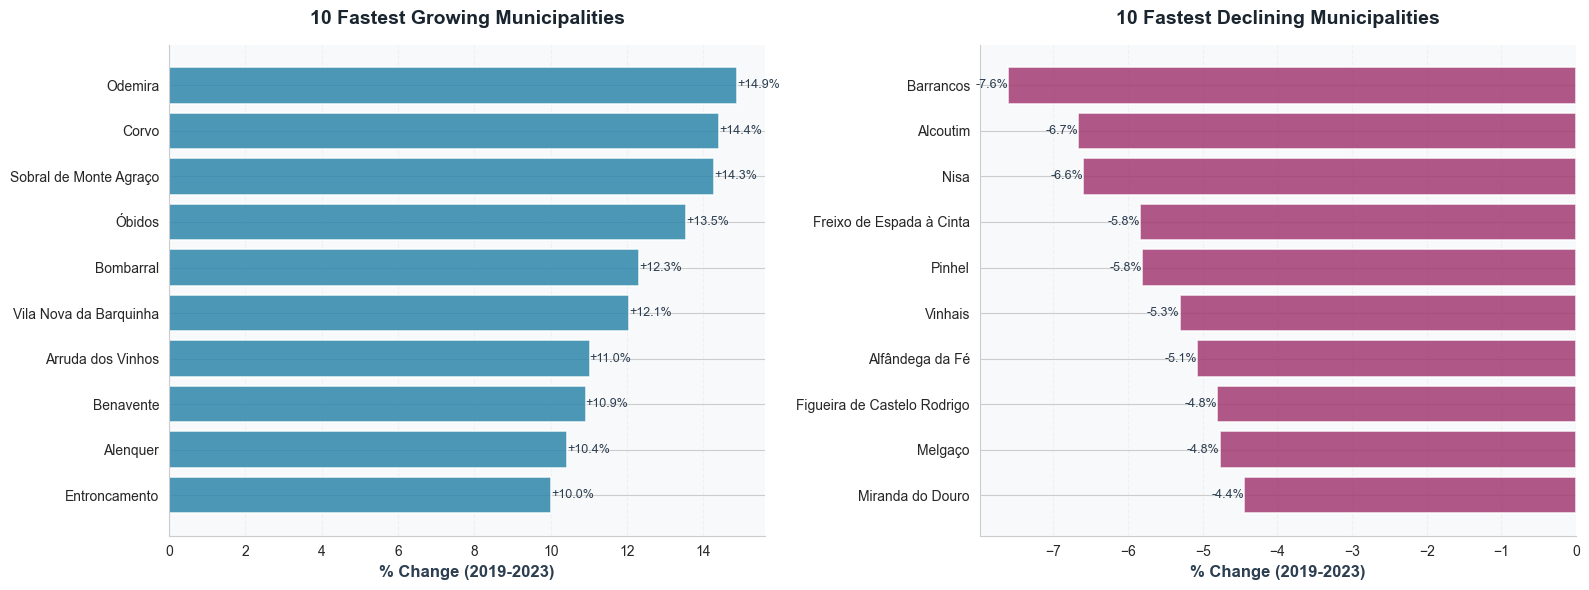

In [7]:
growing = df_density_change.nlargest(10, 'change_pct')
declining = df_density_change.nsmallest(10, 'change_pct')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.patch.set_facecolor('white')

bars1 = ax1.barh(range(len(growing)), growing['change_pct'], color='#2E86AB', alpha=0.85, edgecolor='white', linewidth=1.2)
ax1.set_yticks(range(len(growing)))
ax1.set_yticklabels(growing.index, fontsize=10)
ax1.invert_yaxis()
ax1.set_xlabel('% Change (2019-2023)', fontsize=12, fontweight='600', color='#2C3E50')
ax1.set_title('10 Fastest Growing Municipalities', fontsize=14, fontweight='bold', color='#1A252F', pad=15)
ax1.grid(True, alpha=0.2, axis='x', linestyle='--')
ax1.set_facecolor('#F8F9FA')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for bar, val in zip(bars1, growing['change_pct']):
    ax1.text(val, bar.get_y() + bar.get_height()/2, f'+{val:.1f}%', 
             ha='left', va='center', fontsize=9, color='#2C3E50', fontweight='500')

bars2 = ax2.barh(range(len(declining)), declining['change_pct'], color='#A23B72', alpha=0.85, edgecolor='white', linewidth=1.2)
ax2.set_yticks(range(len(declining)))
ax2.set_yticklabels(declining.index, fontsize=10)
ax2.invert_yaxis()
ax2.set_xlabel('% Change (2019-2023)', fontsize=12, fontweight='600', color='#2C3E50')
ax2.set_title('10 Fastest Declining Municipalities', fontsize=14, fontweight='bold', color='#1A252F', pad=15)
ax2.grid(True, alpha=0.2, axis='x', linestyle='--')
ax2.set_facecolor('#F8F9FA')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for bar, val in zip(bars2, declining['change_pct']):
    ax2.text(val, bar.get_y() + bar.get_height()/2, f'{val:.1f}%', 
             ha='right', va='center', fontsize=9, color='#2C3E50', fontweight='500')

plt.tight_layout()
plt.show()

Portugal exhibits extreme density polarization. Over 70% of municipalities have fewer than 100 people/km², classified as rural or low-density areas where traditional agriculture and depopulation dominate. Only a handful exceed 200 people/km², concentrated in Lisbon and Porto metropolitan areas. This geographic imbalance creates distinct housing submarkets: high-density urban areas face supply constraints and price pressure, while low-density regions struggle with property abandonment and declining values.

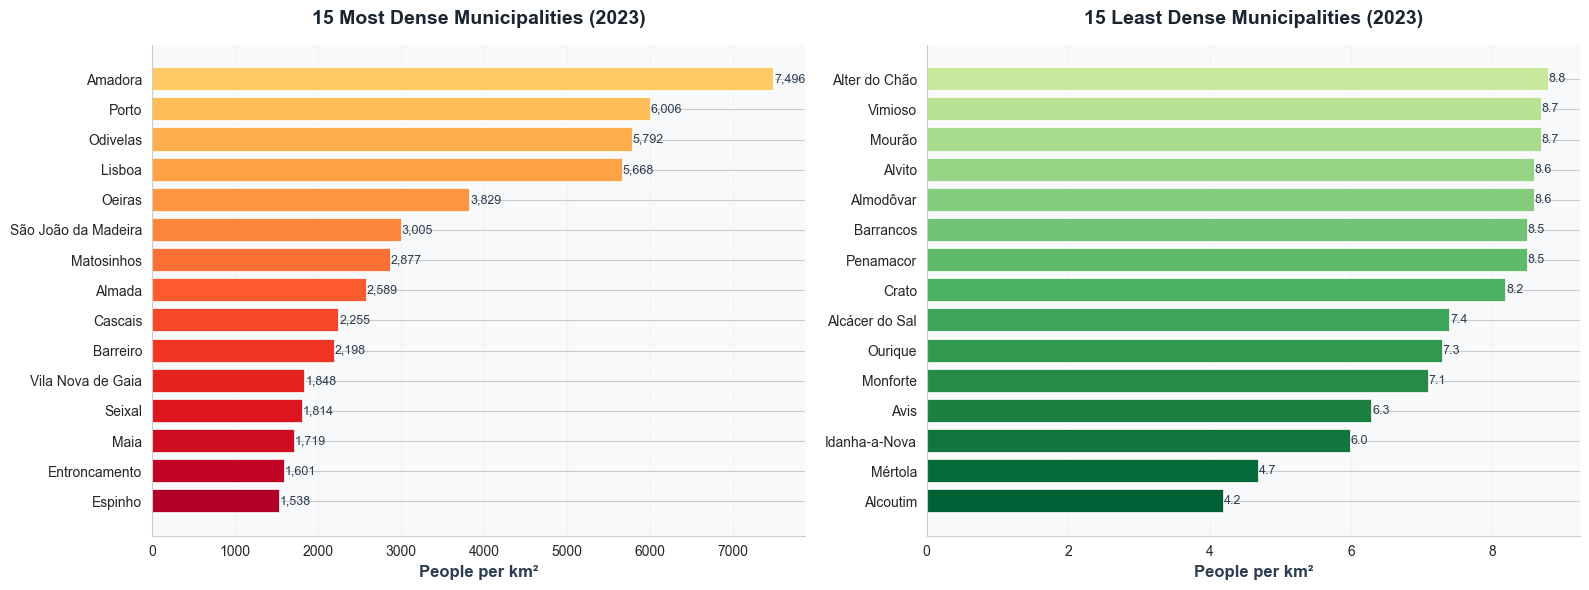

In [8]:
df_2023 = df_density[df_density['year'] == 2023].sort_values('people/km2', ascending=False)

top_15 = df_2023.head(15)
bottom_15 = df_2023.tail(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.patch.set_facecolor('white')

colors_top = plt.cm.YlOrRd(np.linspace(0.3, 0.9, len(top_15)))
bars1 = ax1.barh(range(len(top_15)), top_15['people/km2'], color=colors_top, edgecolor='white', linewidth=1.2)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['municipality'], fontsize=10)
ax1.invert_yaxis()
ax1.set_xlabel('People per km²', fontsize=12, fontweight='600', color='#2C3E50')
ax1.set_title('15 Most Dense Municipalities (2023)', fontsize=14, fontweight='bold', color='#1A252F', pad=15)
ax1.grid(True, alpha=0.2, axis='x', linestyle='--')
ax1.set_facecolor('#F8F9FA')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

for i, (bar, val) in enumerate(zip(bars1, top_15['people/km2'])):
    ax1.text(val, bar.get_y() + bar.get_height()/2, f'{val:,.0f}', 
             ha='left', va='center', fontsize=9, color='#2C3E50', fontweight='500')

colors_bottom = plt.cm.YlGn(np.linspace(0.3, 0.9, len(bottom_15)))
bars2 = ax2.barh(range(len(bottom_15)), bottom_15['people/km2'], color=colors_bottom, edgecolor='white', linewidth=1.2)
ax2.set_yticks(range(len(bottom_15)))
ax2.set_yticklabels(bottom_15['municipality'], fontsize=10)
ax2.invert_yaxis()
ax2.set_xlabel('People per km²', fontsize=12, fontweight='600', color='#2C3E50')
ax2.set_title('15 Least Dense Municipalities (2023)', fontsize=14, fontweight='bold', color='#1A252F', pad=15)
ax2.grid(True, alpha=0.2, axis='x', linestyle='--')
ax2.set_facecolor('#F8F9FA')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

for i, (bar, val) in enumerate(zip(bars2, bottom_15['people/km2'])):
    ax2.text(val, bar.get_y() + bar.get_height()/2, f'{val:.1f}', 
             ha='left', va='center', fontsize=9, color='#2C3E50', fontweight='500')

plt.tight_layout()
plt.show()

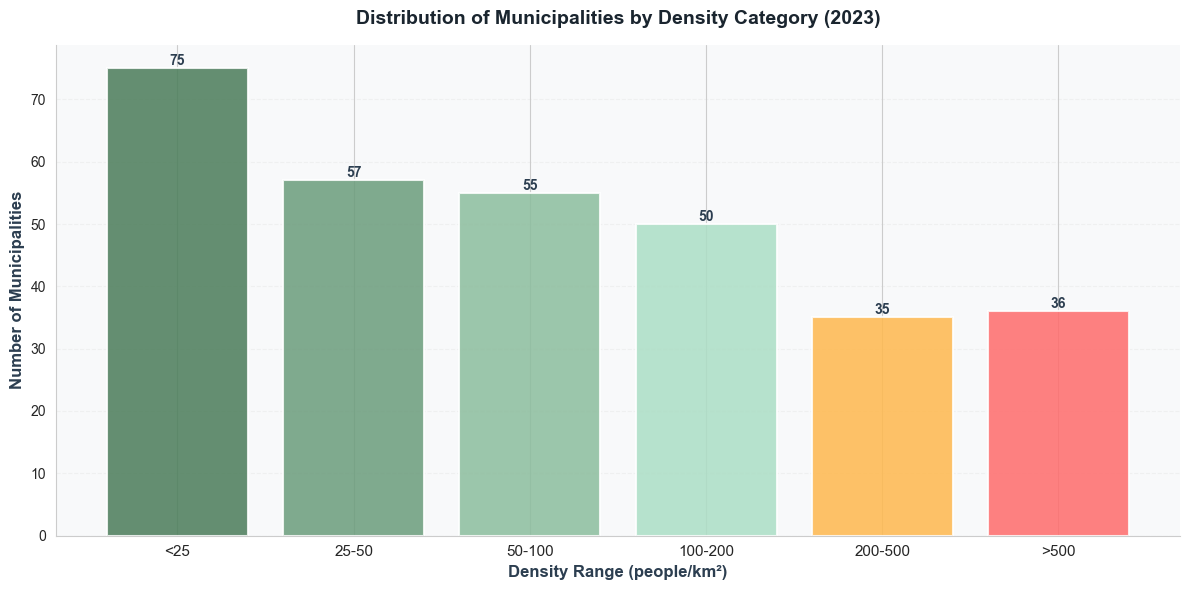

In [9]:
density_bins = [0, 25, 50, 100, 200, 500, 10000]
density_labels = ['<25', '25-50', '50-100', '100-200', '200-500', '>500']

df_2023_binned = df_2023.copy()
df_2023_binned['density_category'] = pd.cut(df_2023_binned['people/km2'], bins=density_bins, labels=density_labels)

category_counts = df_2023_binned['density_category'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('white')

colors = ['#4A7C59', '#6A9C7B', '#8BBD9D', '#ABDEC5', '#FFB84D', '#FF6B6B']
bars = ax.bar(range(len(category_counts)), category_counts.values, color=colors, 
              edgecolor='white', linewidth=1.5, alpha=0.85)

ax.set_xticks(range(len(category_counts)))
ax.set_xticklabels(category_counts.index, fontsize=11, fontweight='500')
ax.set_xlabel('Density Range (people/km²)', fontsize=12, fontweight='600', color='#2C3E50')
ax.set_ylabel('Number of Municipalities', fontsize=12, fontweight='600', color='#2C3E50')
ax.set_title('Distribution of Municipalities by Density Category (2023)', fontsize=14, fontweight='bold', color='#1A252F', pad=15)
ax.grid(True, alpha=0.2, axis='y', linestyle='--')
ax.set_facecolor('#F8F9FA')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for bar, count in zip(bars, category_counts.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{count}', 
            ha='center', va='bottom', fontsize=10, color='#2C3E50', fontweight='600')

plt.tight_layout()
plt.show()

The density extremes reveal Portugal's stark urban-rural divide. Amadora and Odivelas in the Lisbon metro area exceed 7,000 people/km², creating intense competition for housing and driving prices upward. In contrast, rural municipalities like Alcoutim and Barrancos have fewer than 5 people/km², facing economic stagnation and minimal housing demand. This 1,500x difference between densest and sparsest areas reflects Portugal's concentrated urbanization pattern, where coastal cities absorb most economic activity and population growth while interior regions experience systematic decline.